<a href="https://colab.research.google.com/github/AngelescuFilip/ds_salary_proj/blob/master/glassdoor/Glassdoor_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [263]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [264]:
df = pd.read_csv('https://raw.githubusercontent.com/AngelescuFilip/ds_salary_proj/master/glassdoor/glassdoor_salary_data_cleaned.csv')

In [265]:
df.head(20)

,Company_Name,Rating,Job_Title,Location,Salary_Estimate,Description,Revenue,Industry,Founded,Type,...,avg_salary,job_state,age,python_yn,spark_yn,aws_yn,excel_yn,sql_yn,tableau_yn,pytorch_yn
0,Hanker Systems Inc,5.0,Data Scientist,Remote,Employer Provided Salary:$120K - $180K,Title: Data Scientist\n\nDuration: Full Time\n...,Unknown / Non-Applicable,empty,empty,Company - Private,...,150.0,Remote,empty,1,0,0,0,1,0,0
1,HomeAware,empty,Data Scientist,Remote,Employer Provided Salary:$90K - $110K,Engineering\n\nData Team\n\nSummary\n\nUbiety ...,empty,empty,empty,empty,...,100.0,Remote,empty,1,0,1,1,1,0,1
2,National Consulting Partners,empty,Data Scientist,Remote,Employer Provided Salary:$80K - $135K,NCP is seeking a Data Scientist to serve on a ...,Unknown / Non-Applicable,empty,empty,Company - Private,...,107.5,Remote,empty,1,1,0,1,1,0,0
3,Vetro Tech Inc,3.9,Data Scientist,"Philadelphia, PA",Employer Provided Salary:$83K - $99K,We are looking for a Data Scientist to analyze...,Unknown / Non-Applicable,Staffing & Subcontracting,empty,Company - Public,...,91.0,PA,empty,1,0,0,1,1,1,0
4,Redvest App,empty,Data Scientist,Remote,Employer Provided Salary:$60K - $140K,iOS: https://apps.apple.com/us/app/id155187173...,empty,empty,empty,empty,...,100.0,Remote,empty,1,0,0,1,1,1,0
5,PROLIM Corporation,empty,Data Scientist,Remote,Employer Provided Salary:$75.00 - $80.00 Per Hour,Required\n\nSelf-motivated individual who func...,empty,empty,empty,empty,...,77.5,Remote,empty,1,0,0,0,1,1,0
6,Plaxonic,4.6,AML Data Scientist,Remote,Employer Provided Salary:$125K - $130K,At least 5 years of experience in Data Scienti...,$1 to $5 million (USD),Information Technology Support Services,2013,Company - Private,...,127.5,Remote,10,1,1,0,0,0,0,0
7,Datasync Techonlogies Inc,4.9,Data Scientist,"McLean, VA",$92K - $142K (Glassdoor est.),We are looking for a Data Scientist/Engineer w...,Unknown / Non-Applicable,Information Technology Support Services,2003,Company - Private,...,117.0,VA,20,1,0,1,1,1,1,0
8,Octo,4.2,Data Scientist,"Reston, VA",$96K - $139K (Glassdoor est.),"As a Data Scientist at Octo, you will work acr...",$100 to $500 million (USD),Information Technology Support Services,2006,Company - Private,...,117.5,VA,17,1,0,0,1,0,0,1
9,ALDI,3.5,Data Scientist I,"Aurora, IL",$87K - $118K (Glassdoor est.),We have a message to get out: we’re growing. F...,Unknown / Non-Applicable,Grocery Stores,1999,Company - Private,...,102.5,IL,24,1,0,0,0,1,1,0


In [266]:
df.columns

Index(['Company_Name', 'Rating', 'Job_Title', 'Location', 'Salary_Estimate',
       'Description', 'Revenue', 'Industry', 'Founded', 'Type', 'Size',
       'Sector', 'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'avg_salary', 'job_state', 'age', 'python_yn', 'spark_yn', 'aws_yn',
       'excel_yn', 'sql_yn', 'tableau_yn', 'pytorch_yn'],
      dtype='object')

In [267]:
# Changing age and rating to numeric 
df['age'] = df['age'].replace('empty', np.nan)
df['age'] = pd.to_numeric(df['age'])

df['Rating'] = df['Rating'].replace('empty', np.nan)
df['Rating'] = pd.to_numeric(df['Rating'])

In [292]:
def title_simplifier(title):
  if 'data engineer' in title.lower():
    return 'data engineer'
  elif 'analyst' in title.lower():
    return 'analyst'
  elif 'manager' in title.lower():
    return 'manager'
  elif 'director' in title.lower():
    return 'director'
  elif 'machine learning' in title.lower() or 'ml' in title.lower():
    return 'machine learning'
  elif 'data scientist' in title.lower():
    return 'data scientist'
  else:
    return 'na'

def seniority(title):
  if 'jr' in title.lower() or 'junior' in title.lower() or 'jr.' in title.lower():
    return 'junior'
  elif 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal':
    return 'senior'
  else:
    return 'na'

In [293]:
df['job_simp'] = df['Job_Title'].apply(title_simplifier)

In [294]:
df.job_simp.value_counts()

data scientist      117
na                    8
machine learning      4
analyst               1
Name: job_simp, dtype: int64

In [271]:
df['seniority'] = df['Job_Title'].apply(seniority)
df.seniority.value_counts()

senior    117
junior     13
Name: seniority, dtype: int64

In [272]:
df.head()

,Company_Name,Rating,Job_Title,Location,Salary_Estimate,Description,Revenue,Industry,Founded,Type,...,age,python_yn,spark_yn,aws_yn,excel_yn,sql_yn,tableau_yn,pytorch_yn,job_simp,seniority
0,Hanker Systems Inc,5.0,Data Scientist,Remote,Employer Provided Salary:$120K - $180K,Title: Data Scientist\n\nDuration: Full Time\n...,Unknown / Non-Applicable,empty,empty,Company - Private,...,NaN,1,0,0,0,1,0,0,data scientist,senior
1,HomeAware,NaN,Data Scientist,Remote,Employer Provided Salary:$90K - $110K,Engineering\n\nData Team\n\nSummary\n\nUbiety ...,empty,empty,empty,empty,...,NaN,1,0,1,1,1,0,1,data scientist,senior
2,National Consulting Partners,NaN,Data Scientist,Remote,Employer Provided Salary:$80K - $135K,NCP is seeking a Data Scientist to serve on a ...,Unknown / Non-Applicable,empty,empty,Company - Private,...,NaN,1,1,0,1,1,0,0,data scientist,senior
3,Vetro Tech Inc,3.9,Data Scientist,"Philadelphia, PA",Employer Provided Salary:$83K - $99K,We are looking for a Data Scientist to analyze...,Unknown / Non-Applicable,Staffing & Subcontracting,empty,Company - Public,...,NaN,1,0,0,1,1,1,0,data scientist,senior
4,Redvest App,NaN,Data Scientist,Remote,Employer Provided Salary:$60K - $140K,iOS: https://apps.apple.com/us/app/id155187173...,empty,empty,empty,empty,...,NaN,1,0,0,1,1,1,0,data scientist,senior


In [273]:
# Fix state Illinois
df['job_state'] = df['job_state'].apply(lambda x: x.strip() if x.strip().lower() != 'illinois' else 'IL')
df.job_state.value_counts()

Remote    49
CA        13
VA        12
IL        12
WA         6
DC         4
MA         4
NY         4
NC         4
OH         3
GA         3
TX         2
FL         2
PA         2
CO         1
MS         1
WI         1
CT         1
MI         1
MD         1
NJ         1
WV         1
AL         1
TN         1
Name: job_state, dtype: int64

In [274]:
# Job description length
df['desc_length'] = df['Description'].apply(lambda x: len(x))
df['desc_length']

0      4263
1      4000
2      3433
3      1792
4      2858
       ... 
125     663
126       5
127    1977
128    3433
129     569
Name: desc_length, Length: 130, dtype: int64

In [275]:
# Hourly wage to annual
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary, axis = 1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.max_salary, axis = 1)

In [276]:
df[df.hourly == 1][['hourly', 'min_salary', 'max_salary']]

,hourly,min_salary,max_salary
5,1,150.00,160.00
13,1,110.00,120.00
14,1,100.00,110.00
15,1,140.00,140.00
16,1,130.00,150.00
22,1,110.00,110.00
23,1,180.00,180.00
24,1,80.00,90.84
29,1,116.00,134.00
49,1,64.00,90.00


In [277]:
df.describe()

,Rating,hourly,employer_provided,min_salary,max_salary,avg_salary,age,python_yn,spark_yn,aws_yn,excel_yn,sql_yn,tableau_yn,pytorch_yn,desc_length
count,117.000000,130.000000,130.000000,130.000000,130.000000,130.000000,93.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,3.910256,0.130769,0.692308,100.471846,137.193846,110.433731,34.193548,0.807692,0.146154,0.261538,0.415385,0.592308,0.261538,0.092308,4465.161538
std,0.540655,0.338452,0.463324,36.483371,39.004912,38.428426,32.730207,0.395638,0.354627,0.441173,0.494695,0.493306,0.441173,0.290580,2350.891735
min,2.500000,0.000000,0.000000,20.000000,40.000000,30.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,3.500000,0.000000,0.000000,80.000000,114.000000,92.500000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2602.750000
50%,3.900000,0.000000,1.000000,89.000000,131.000000,106.000000,21.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4160.000000
75%,4.200000,0.000000,1.000000,120.000000,150.000000,123.125000,48.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,6022.250000
max,5.000000,1.000000,1.000000,245.000000,262.000000,253.500000,118.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11383.000000


In [278]:
df.columns

Index(['Company_Name', 'Rating', 'Job_Title', 'Location', 'Salary_Estimate',
       'Description', 'Revenue', 'Industry', 'Founded', 'Type', 'Size',
       'Sector', 'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'avg_salary', 'job_state', 'age', 'python_yn', 'spark_yn', 'aws_yn',
       'excel_yn', 'sql_yn', 'tableau_yn', 'pytorch_yn', 'job_simp',
       'seniority', 'desc_length'],
      dtype='object')

<Axes: >

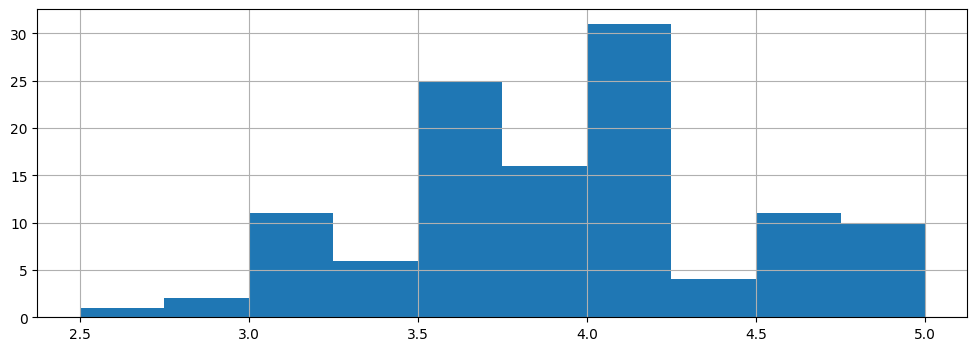

In [279]:
df['Rating'].hist(figsize=(12,4))

<Axes: >

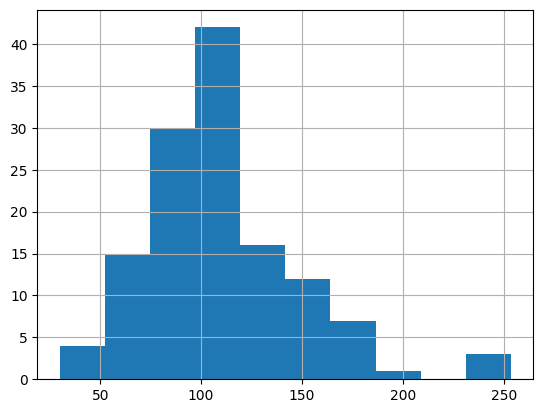

In [280]:
df['avg_salary'].hist()

<Axes: >

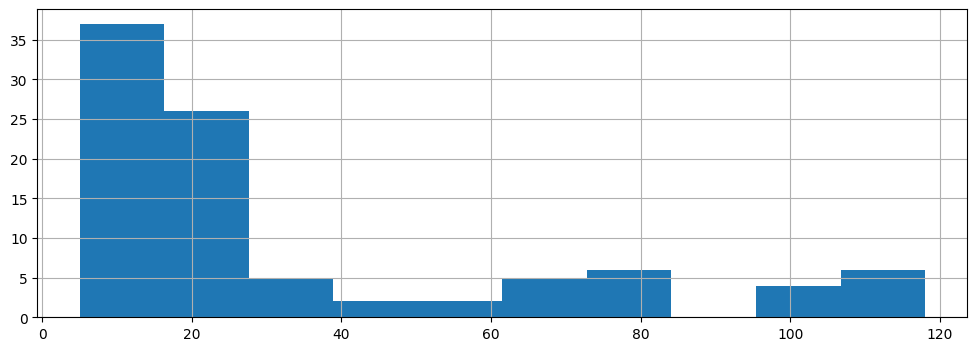

In [281]:
df['age'].hist(figsize=(12,4))

<Axes: >

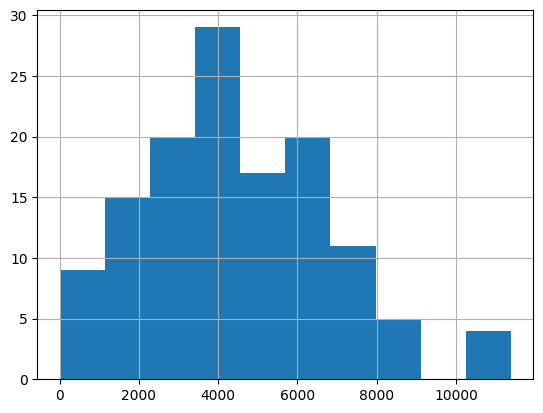

In [282]:
df['desc_length'].hist()

<Axes: >

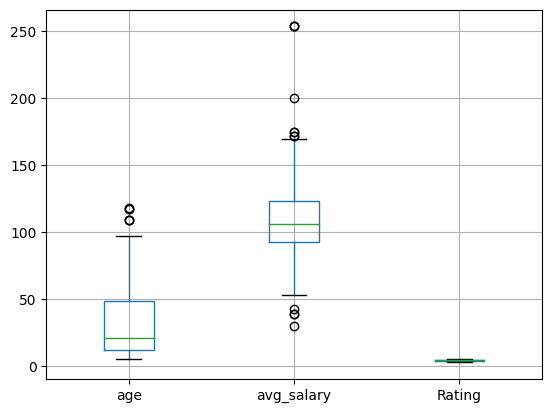

In [283]:
df.boxplot(column=['age', 'avg_salary', 'Rating']) 

<Axes: >

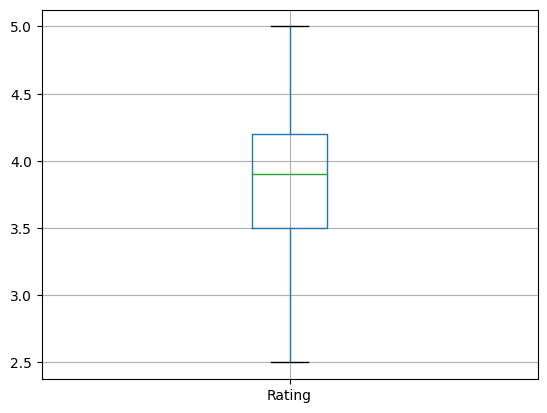

In [284]:
df.boxplot(column=['Rating']) 

In [285]:
corr = df[['age', 'avg_salary', 'Rating', 'desc_length']].corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)

<Axes: >

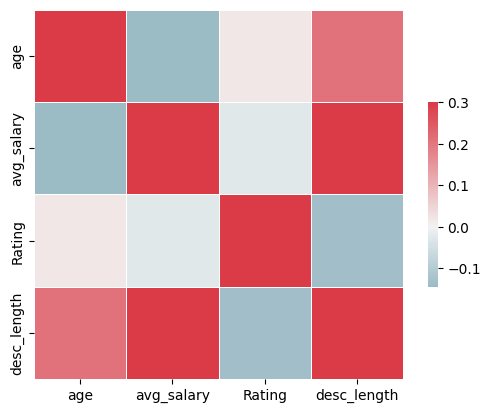

In [286]:
sns.heatmap(corr, vmax=.3, center=0, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5})
# We can see a corelation between age and description length and also between average salary and description length

In [287]:
df.columns

Index(['Company_Name', 'Rating', 'Job_Title', 'Location', 'Salary_Estimate',
       'Description', 'Revenue', 'Industry', 'Founded', 'Type', 'Size',
       'Sector', 'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'avg_salary', 'job_state', 'age', 'python_yn', 'spark_yn', 'aws_yn',
       'excel_yn', 'sql_yn', 'tableau_yn', 'pytorch_yn', 'job_simp',
       'seniority', 'desc_length'],
      dtype='object')

In [288]:
df_cat = df[['Location', 'Type', 'Size', 'Industry', 'Sector', 'Revenue', 'job_state', 'python_yn', 'spark_yn', 'aws_yn',
    'excel_yn', 'sql_yn', 'tableau_yn', 'pytorch_yn', 'job_simp', 'seniority']]

graph for Location: total = 44


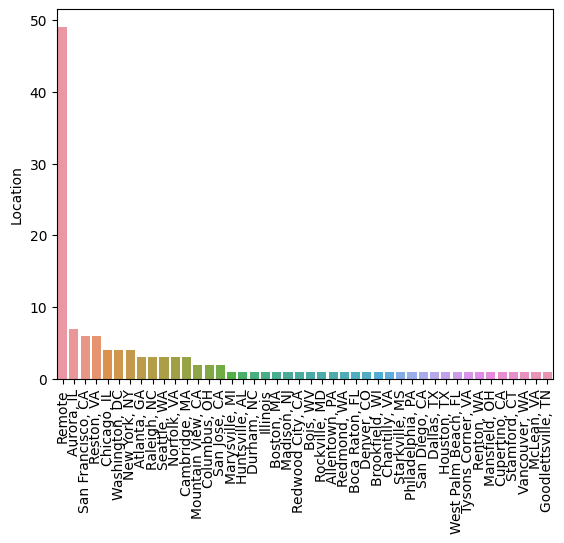

graph for Type: total = 8


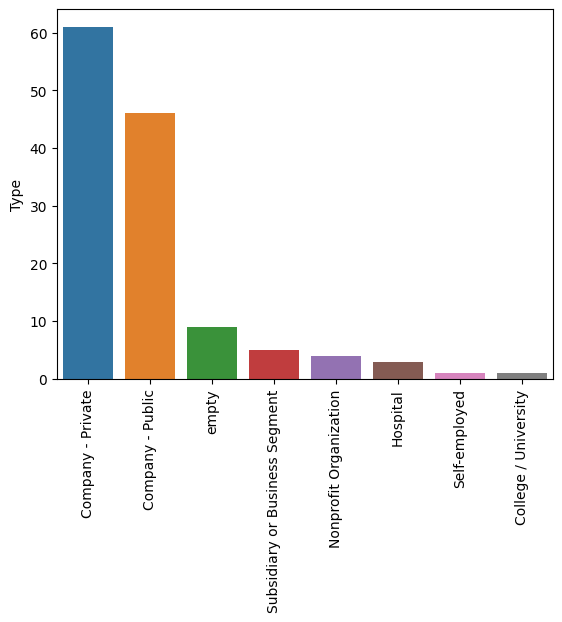

graph for Size: total = 9


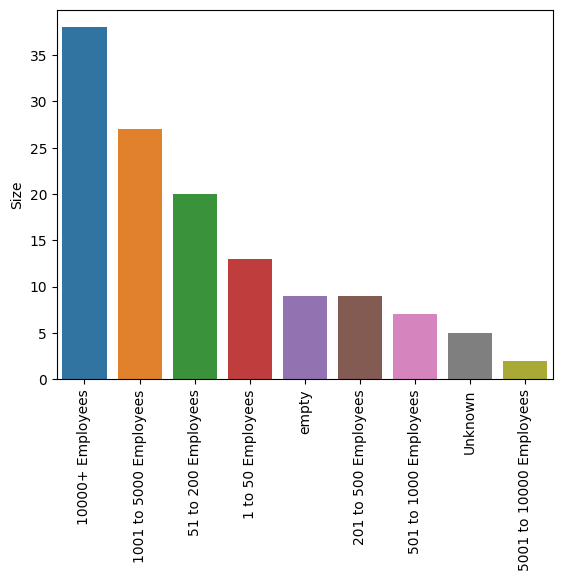

graph for Industry: total = 34


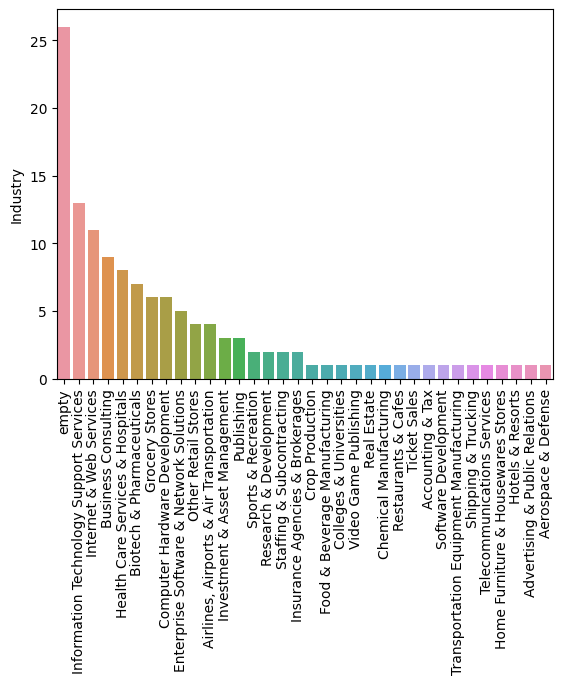

graph for Sector: total = 20


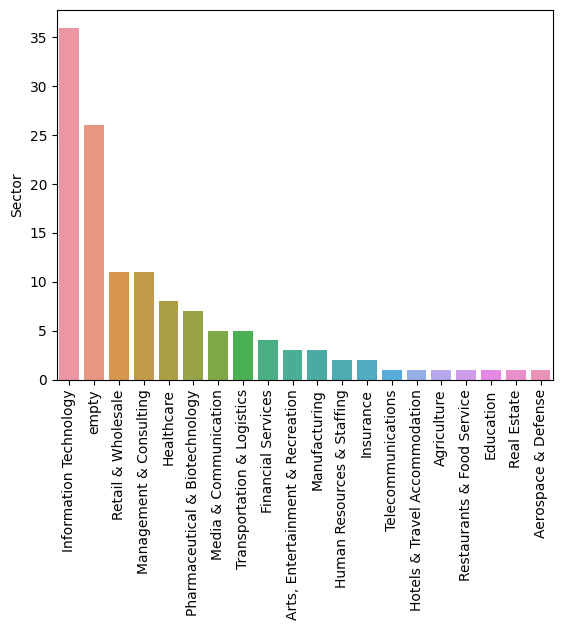

graph for Revenue: total = 11


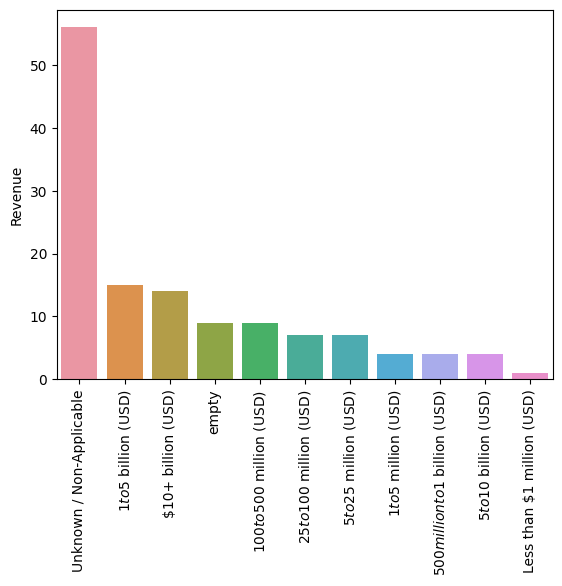

graph for job_state: total = 24


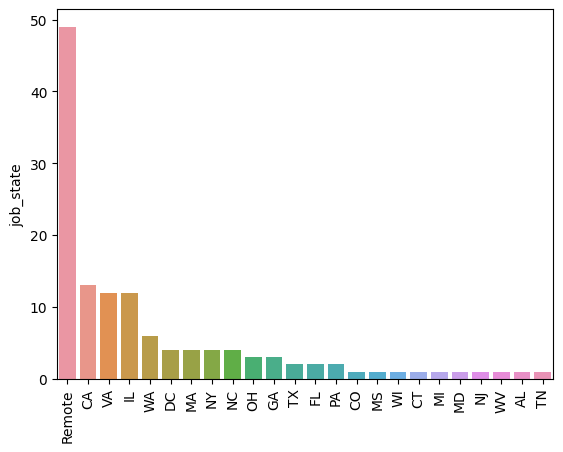

graph for python_yn: total = 2


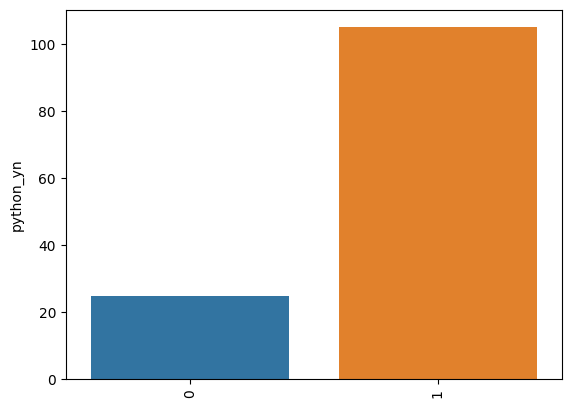

graph for spark_yn: total = 2


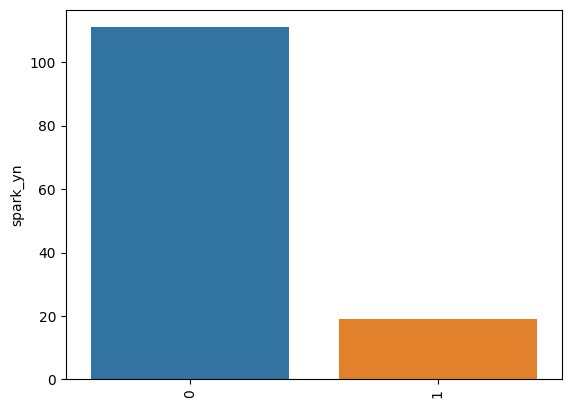

graph for aws_yn: total = 2


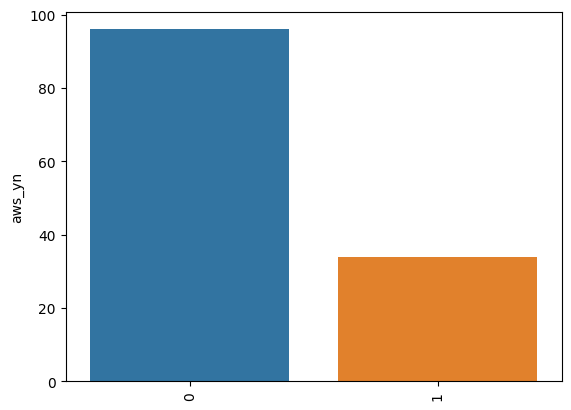

graph for excel_yn: total = 2


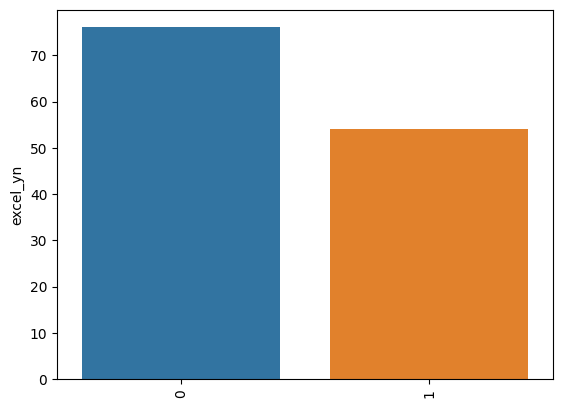

graph for sql_yn: total = 2


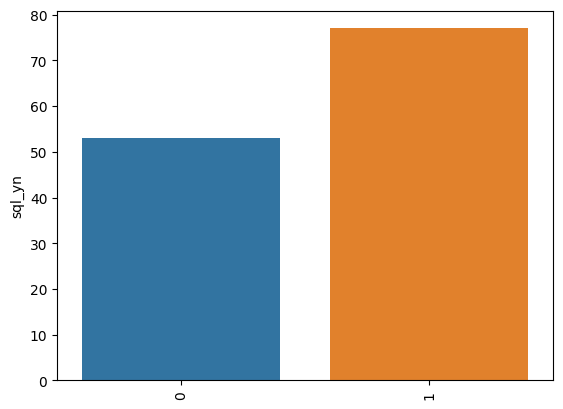

graph for tableau_yn: total = 2


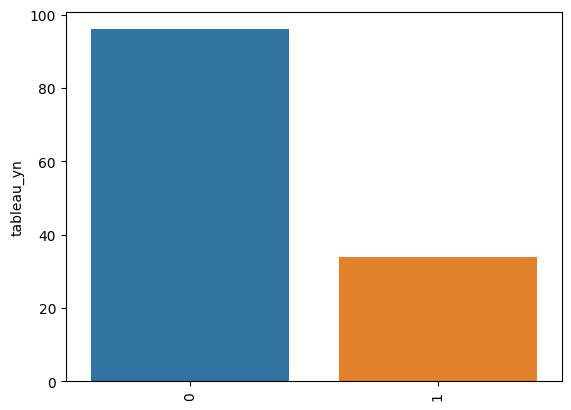

graph for pytorch_yn: total = 2


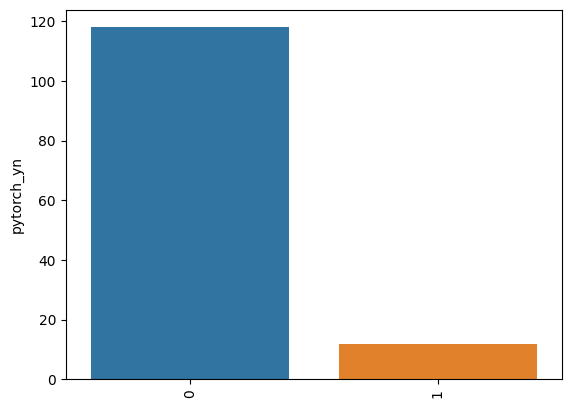

graph for job_simp: total = 2


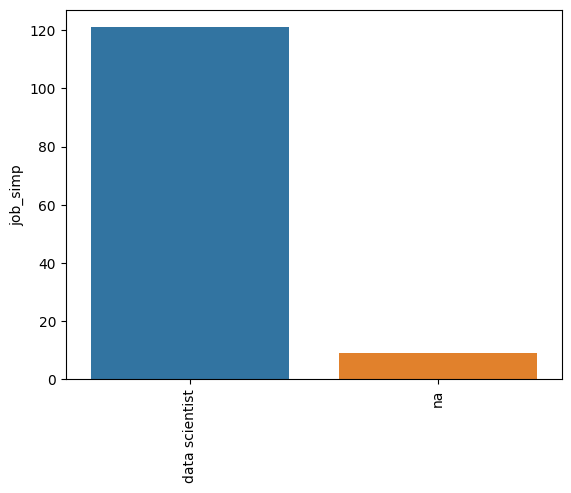

graph for seniority: total = 2


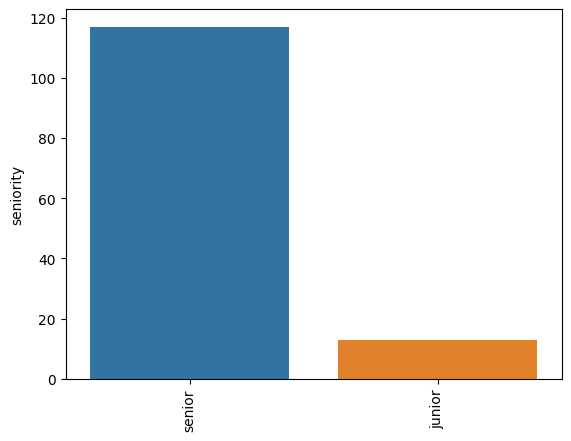

In [289]:
for i in df_cat.columns:
  cat_num = df_cat[i].value_counts()
  print('graph for %s: total = %d' % (i, len(cat_num)))
  chart = sns.barplot(x=cat_num.index, y=cat_num)
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
  plt.show()

graph for Location: total = 20


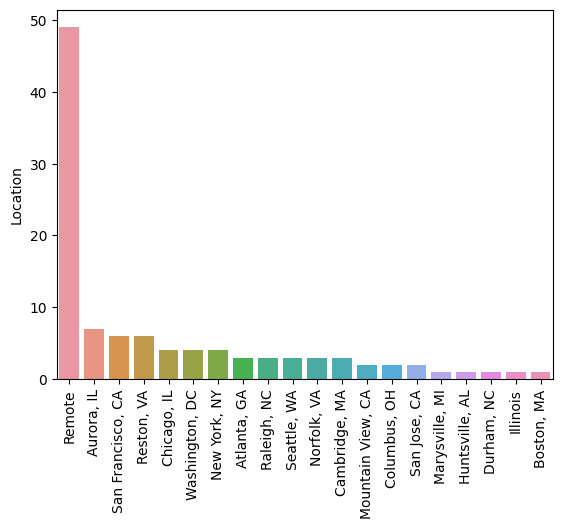

In [290]:
for i in df_cat[['Location', ]].columns:
  cat_num = df_cat[i].value_counts()[:20]
  print('graph for %s: total = %d' % (i, len(cat_num)))
  chart = sns.barplot(x=cat_num.index, y=cat_num)
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
  plt.show()

In [291]:
df.columns

Index(['Company_Name', 'Rating', 'Job_Title', 'Location', 'Salary_Estimate',
       'Description', 'Revenue', 'Industry', 'Founded', 'Type', 'Size',
       'Sector', 'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'avg_salary', 'job_state', 'age', 'python_yn', 'spark_yn', 'aws_yn',
       'excel_yn', 'sql_yn', 'tableau_yn', 'pytorch_yn', 'job_simp',
       'seniority', 'desc_length'],
      dtype='object')

In [302]:
pd.pivot_table(df, index = ['job_simp'], values = 'avg_salary')

,avg_salary
job_simp,
analyst,101.000000
data scientist,113.430641
machine learning,100.000000
na,73.000000


In [305]:
pd.pivot_table(df, index = ['job_state', 'job_simp'], values = 'avg_salary').sort_values('job_state')

avg_salary
job_state job_simp                    
AL        data scientist    107.000000
CA        data scientist    145.545455
          machine learning  142.500000
          na                 91.000000
CO        data scientist     95.000000
CT        data scientist     90.000000
DC        data scientist    106.625000
FL        data scientist     95.000000
GA        data scientist    104.000000
IL        data scientist    107.500000
MA        data scientist    116.625000
MD        data scientist     94.000000
MI        na                 57.500000
MS        data scientist     69.000000
NC        data scientist     98.875000
NJ        data scientist    156.000000
NY        data scientist    133.250000
OH        data scientist     89.000000
          na                 90.000000
PA        data scientist     92.250000
Remote    analyst           101.000000
          data scientist    117.582561
          machine learning   85.833333
          na                 51.750000
TN        data scientist     93.500000
TX        data scientist    108.000000
VA        data scientist    103.708333
WA        data scientist    124.200000
          na                138.500000
WI        data scientist     57.500000
WV        data scientist     30.000000

In [306]:
# More will be added soon 

60